# Analyze the clusters acoustically


In [44]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [45]:
data_folder = pathlib.Path('./data/')
processed_folder = data_folder.joinpath('processed')

n_join_bins = 5

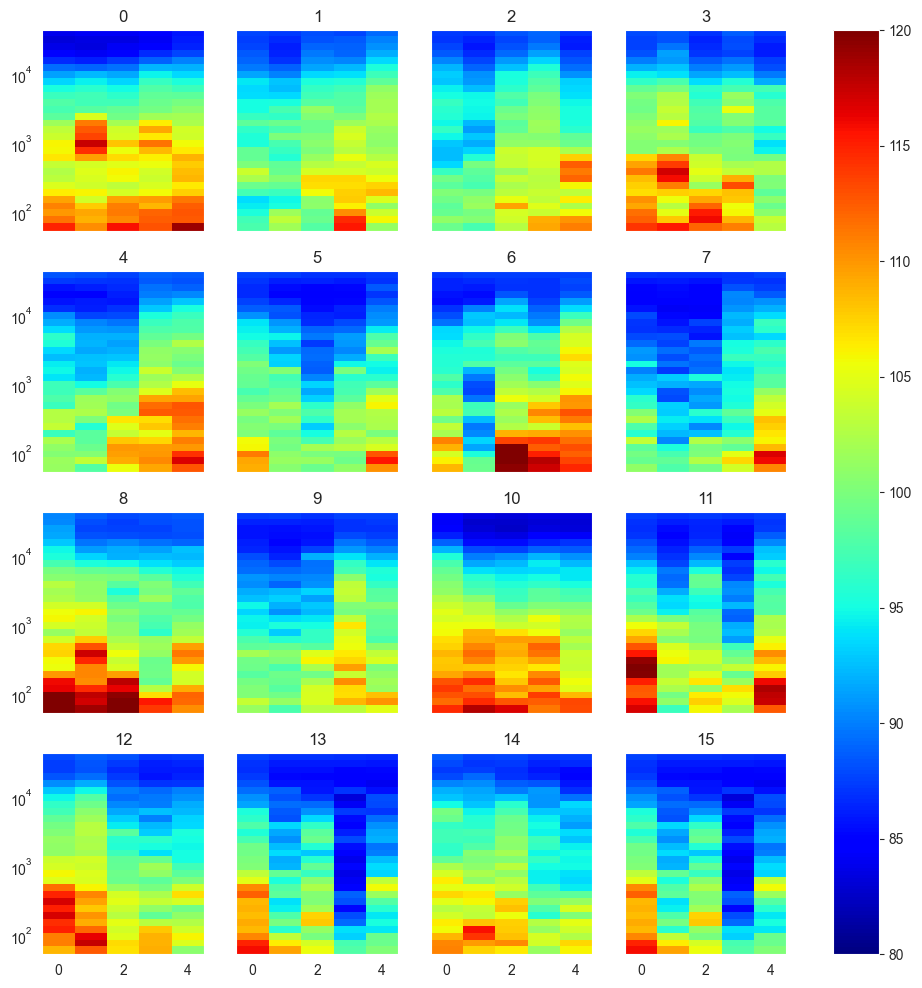

In [77]:
df = pd.read_pickle(processed_folder.joinpath('umap_clean_with_clusters.pkl'))
df_features = pd.read_pickle(processed_folder.joinpath('df_no_artifacts.pkl'))
freqticks = np.load(processed_folder.joinpath('used_freqticks.npy'))

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(12, 12))
i = 0
j = 0
for cl, df_cl in df.groupby('clusters'):
    if cl >= 0:
        x_mean, y_mean = df_cl[[0, 1]].mean(axis=0)
        df_cl['diff_sum'] = (df[0] - x_mean)**2 + (df[1] - y_mean)**2
        centroid_sample_idx = df_cl.diff_sum.argmin()

        centroid_sample = df_features.iloc[centroid_sample_idx, :len(freqticks)*n_join_bins].astype(float)
        im = ax[i, j].pcolormesh(np.arange(n_join_bins), freqticks, centroid_sample.values.reshape((n_join_bins, -1), order='F').T,
                                           shading='auto', cmap='jet', vmin=80, vmax=120)
        ax[i, j].set_title(cl)
        if ((j % 3) == 0) and (j > 0):
            i += 1
            j = 0
        else:
            j += 1

fig.colorbar(im, ax=ax.ravel().tolist())
plt.yscale('log')
plt.show()
